<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/RNN_Keras_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Load Data

Load Miles_Traveled dataset.

In [0]:
df = pd.read_csv('Miles_Traveled.csv', index_col = 'DATE', parse_dates = True)

In [5]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [0]:
# Set frequency
df.index.freq ='MS'

In [0]:
# Rename column

df.columns = ['Value']

In [12]:
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


## Plot the Timeseries

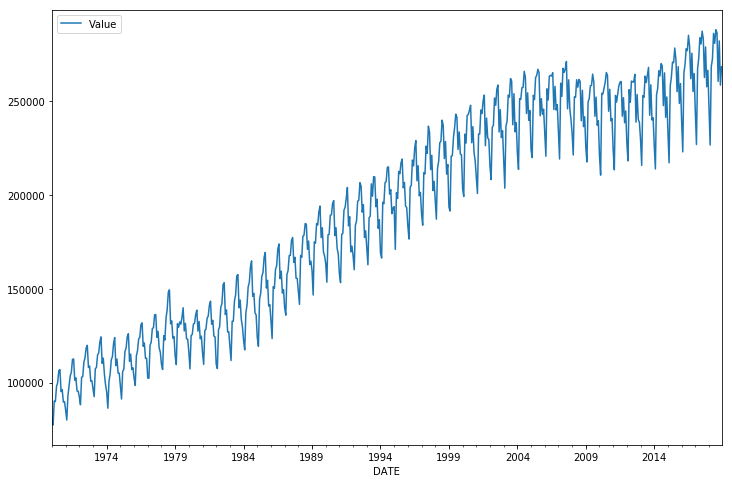

In [13]:
df.plot(figsize=(12,8))

## Perform a Seasonal Decomposition on the Model and plot out ETS Components

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
# Format plot to enhance ETS graph

from pylab import rcParams

rcParams['figure.figsize'] = 12,8

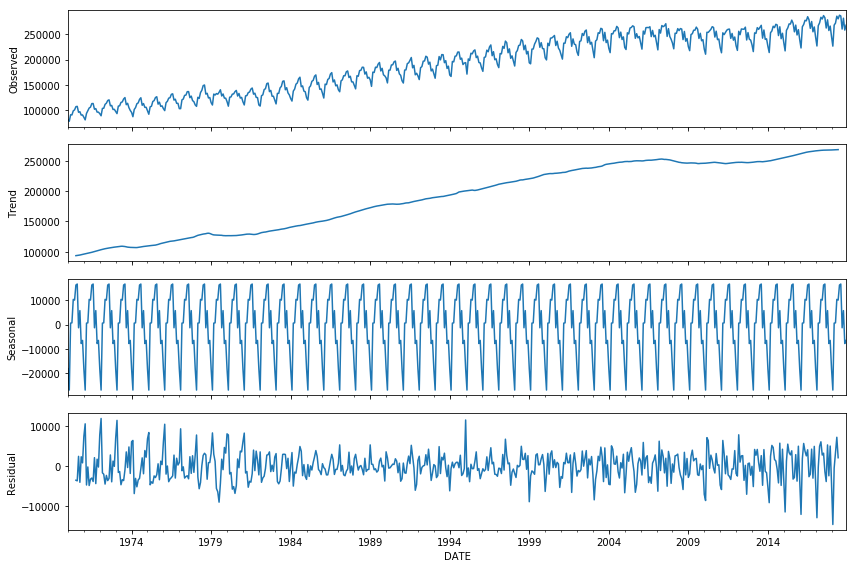

In [22]:
results = seasonal_decompose(df['Value'])
results.plot();

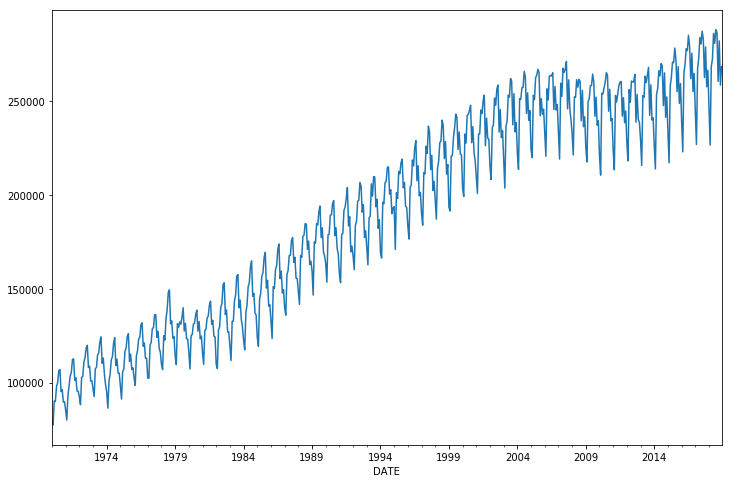

In [23]:
results.observed.plot();

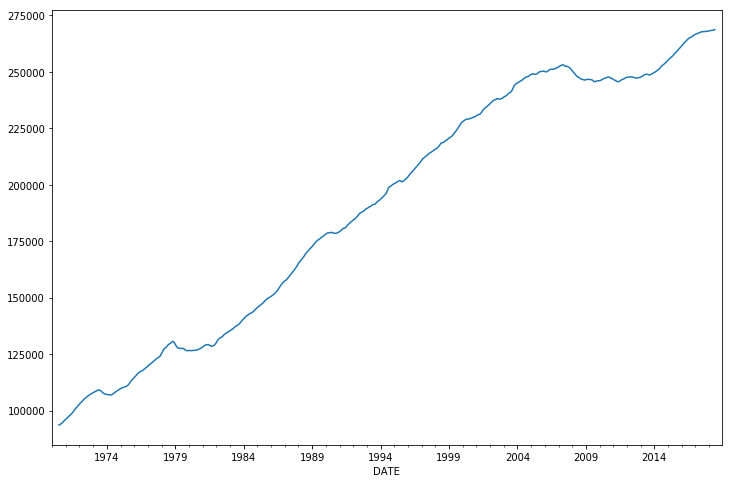

In [25]:
results.trend.plot();

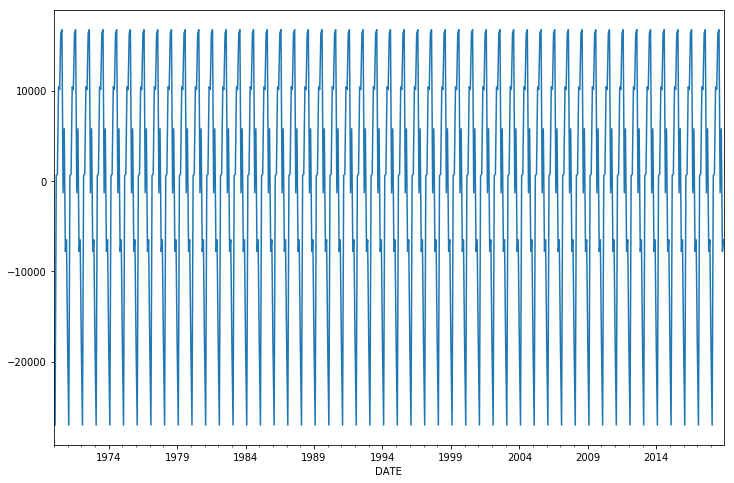

In [27]:
results.seasonal.plot();

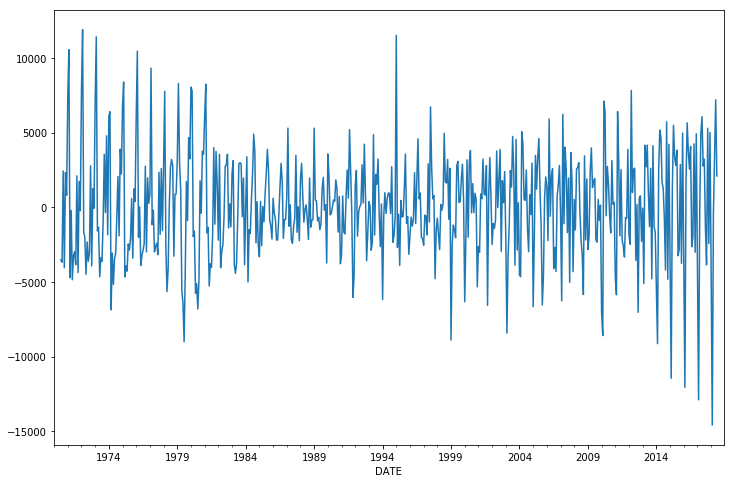

In [38]:
results.resid.plot()


## Perform Train-Test-Split

In [39]:
len(df)

588

In [0]:
# set test to the las 12 months of data

train = df.iloc[:576]
test = df.iloc[576:]

In [41]:
len(test)

12

## Scale Data

Use MinMaxScaler to scale the train and test sets into.

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
# create scaler object
scaler = MinMaxScaler()

In [44]:
# fit scaler objec to the scaler set

scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
# create scaled versions
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Time Series Generator

Create a TimeSeriesGenerator object based off the scaled_train data. The n_input should be at minumum 12. 

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
n_input  = 24  # 2 years worth of data

n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)



## Create Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [52]:
model = Sequential()

model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


W0728 03:10:12.495557 139697755805568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


### Fit model to generator

In [54]:
model.fit_generator(generator, epochs=30)

W0728 03:11:14.787563 139697755805568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 03:11:15.426002 139697755805568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0728 03:11:15.510302 139697755805568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/30
552/552 [==============================] - 10s 19ms/step - loss: 0.0144
Epoch 2/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0063
Epoch 3/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0055
Epoch 4/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0058
Epoch 5/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0049
Epoch 6/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0049
Epoch 7/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0043
Epoch 8/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0031
Epoch 9/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0019
Epoch 10/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0015
Epoch 11/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0014
Epoch 12/30
552/552 [==============================] - 10s 18ms/step - loss: 0.0014
E

## Plot History of Loss

In [0]:
loss_per_epoch = model.history.history['loss']

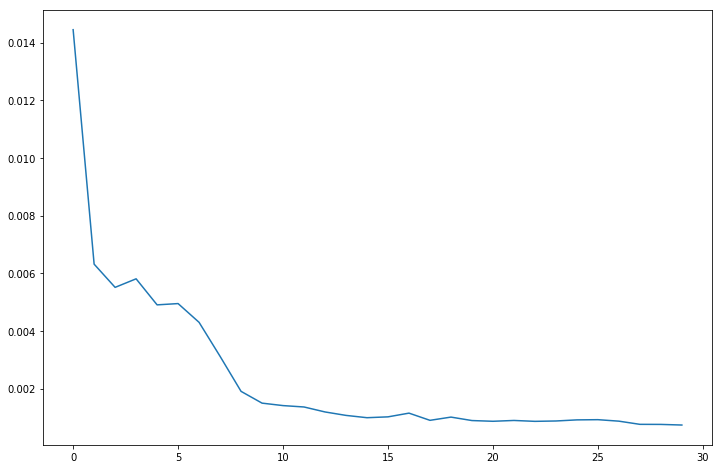

In [56]:
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

## Evaluate on Test Data


In [58]:
# create 1st eval batch by grabbing the last year from scaled_train

first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

## Generate predictions into the same time stamps as the test set

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]

current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  
  test_predictions.append(current_pred)
  
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

### Inverse Transformations and Compare Predictions

In [0]:
true_predictions = scaler.inverse_transform(test_predictions)

In [64]:
true_predictions

array([[247899.53546548],
       [234672.21441597],
       [266170.08317435],
       [273079.27404642],
       [281818.42225868],
       [283270.74532485],
       [288362.8277303 ],
       [283465.95562094],
       [268450.33910948],
       [276456.0005545 ],
       [260388.01500785],
       [265983.33036464]])

In [65]:
# Add true_predictions to dataframe
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
test.head()

,Value,Predictions
DATE,,
2018-01-01,245695.0,247899.535465
2018-02-01,226660.0,234672.214416
2018-03-01,268480.0,266170.083174
2018-04-01,272475.0,273079.274046
2018-05-01,286164.0,281818.422259


## Plot the Predictions

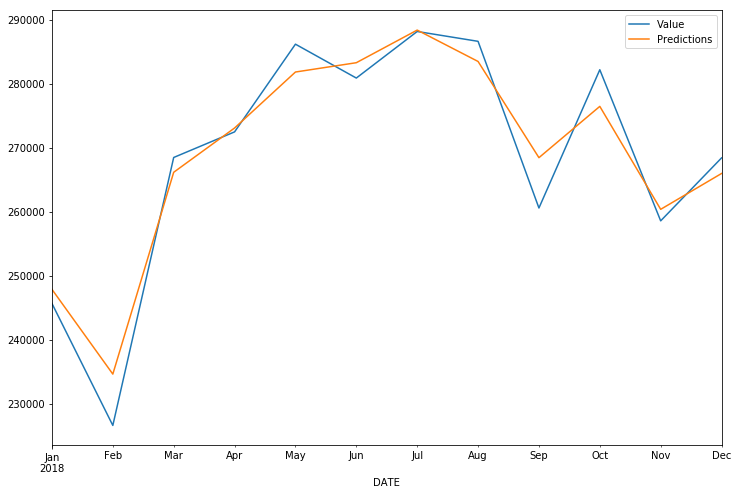

In [68]:
test.plot(figsize=(12,8));

## Saving Model

In [0]:
model.save('RNN_Keras_TimeSeries_Model.h5')